In [1]:
#图像的几种运算：加法，减法，按位运算
#cv.add, cv.addWeighted()
#Image Addition
#OpenCV加法和Numpy加法之间有区别。OpenCV加法是饱和运算，而Numpy加法是模运算。
import cv2 as cv 
import numpy as np
from matplotlib import pyplot as plt

x = np.uint8([250]) #饱和运算
y = np.uint8([10])  #模运算

print(cv.add(x,y))
print(x + y)

[[255]]
[4]


In [2]:
#图像融合
#g(x)=(1−α)f0(x)+αf1(x)
img2 = cv.imread("../Images/img2.png")
img3 = cv.imread("../Images/img3.png")
#dst=α⋅img1+β⋅img2+γ
dst = cv.addWeighted(img2,0.7,img3,0.3,0)
cv.namedWindow("dst",cv.WINDOW_NORMAL)
cv.imshow("dst", dst)
cv.waitKey(0)
cv.destroyAllWindows()

(<AxesSubplot:title={'center':'Img16_Mask_Inv'}>,
 Text(0.5, 1.0, 'Img16_Mask_Inv'))

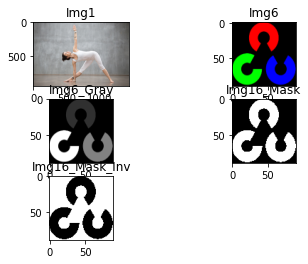

In [3]:
#按位运算
#and，or，Not，Xor
#Lode images
img1 = cv.imread("../Images/img1.jpg")
img6 = cv.imread("../Images/img6.png")
img1 = img1[:,:,::-1]
img6 = img6[:,:,::-1]

#Create a ROI
rows, cols, channels = img6.shape
roi = img1[0:rows, 0:cols]

#Create a mask of logo and inverse mask also
img6gray = cv.cvtColor(img6, cv.COLOR_BGR2GRAY)
#图像二值化
ret, mask = cv.threshold(img6gray,10,255,cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

plt.subplot(321),plt.imshow(img1),plt.title("Img1")
plt.subplot(322),plt.imshow(img6),plt.title("Img6")
plt.subplot(323),plt.imshow(img6gray,"gray"),plt.title("Img6_Gray")
plt.subplot(324),plt.imshow(mask,"gray"),plt.title("Img16_Mask")
plt.subplot(325),plt.imshow(mask_inv,"gray"),plt.title("Img16_Mask_Inv")


(<AxesSubplot:title={'center':'img1_bg'}>,
 Text(0.5, 1.0, 'img1_bg'))

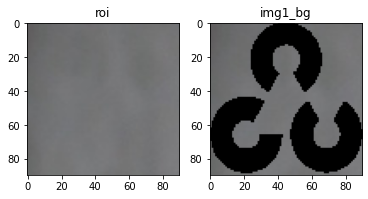

In [4]:
#Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
plt.subplot(121),plt.imshow(roi),plt.title("roi")
plt.subplot(122),plt.imshow(img1_bg),plt.title("img1_bg")

(<AxesSubplot:title={'center':'img6_fg'}>,
 Text(0.5, 1.0, 'img6_fg'))

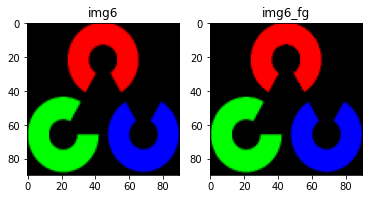

In [5]:

# Take only region of logo from logo image.
img6_fg = cv.bitwise_and(img6,img6,mask = mask)
plt.subplot(121),plt.imshow(img6),plt.title("img6")
plt.subplot(122),plt.imshow(img6_fg),plt.title("img6_fg")

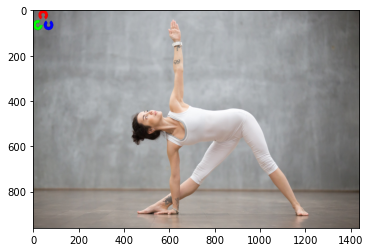

In [6]:
# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img6_fg)
img1[0:rows, 0:cols ] = dst
plt.imshow(img1)